# DeepAR: Probabilistic Forecasting with Autoregressive Recurrent Networks (https://arxiv.org/pdf/1704.04110)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data for univariate time series forecasting
def generate_series(seq_len=30, forecast_horizon=5, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        freq = np.random.rand() * 0.5 + 0.1
        series = np.sin(np.linspace(start, start + freq * (seq_len + forecast_horizon), seq_len + forecast_horizon))
        X.append(series[:seq_len])
        y.append(series[seq_len:])
    return np.array(X)[..., np.newaxis], np.array(y)

In [4]:
# Dataset
seq_len, horizon = 30, 5
X, y = generate_series(seq_len, horizon)
X_train, X_val, y_train, y_val = X[:800], X[800:], y[:800], y[800:]

In [5]:
# Define DeepAR-like LSTM model
input_layer = Input(shape=(seq_len, 1))
x = LSTM(64, return_sequences=False)(input_layer)
output = Dense(horizon)(x)
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4731 - mae: 0.6145 - val_loss: 0.3696 - val_mae: 0.5296
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3572 - mae: 0.5211 - val_loss: 0.3290 - val_mae: 0.4867
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3251 - mae: 0.4887 - val_loss: 0.3103 - val_mae: 0.4679
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3087 - mae: 0.4766 - val_loss: 0.3337 - val_mae: 0.4769
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2818 - mae: 0.4439 - val_loss: 0.2643 - val_mae: 0.4299


In [7]:
# Evaluate
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2673 - mae: 0.4332 
Validation MAE: 0.4299


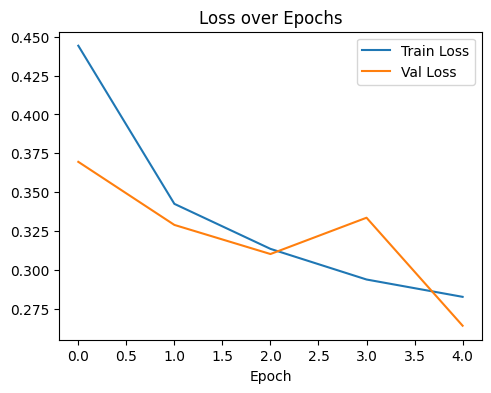

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.legend()


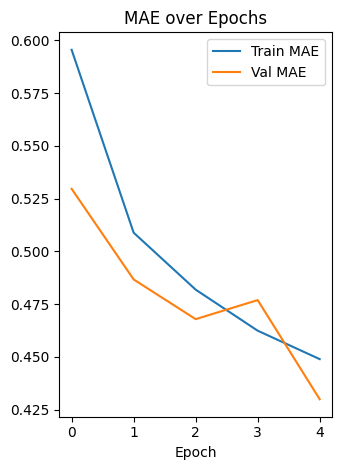

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


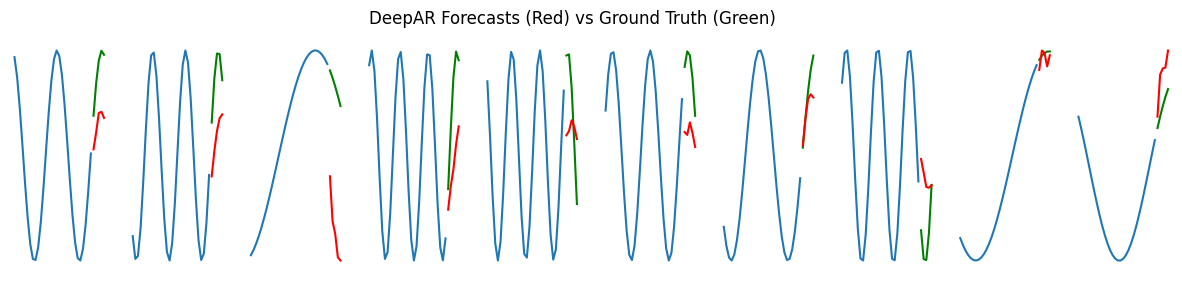

In [10]:
# Visualize predictions
preds = model.predict(X_val[:10])
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.plot(range(seq_len), X_val[i].squeeze(), label='Input')
    plt.plot(range(seq_len, seq_len + horizon), y_val[i], label='True', color='green')
    plt.plot(range(seq_len, seq_len + horizon), preds[i], label='Pred', color='red')
    plt.axis('off')
plt.suptitle('DeepAR Forecasts (Red) vs Ground Truth (Green)')
plt.show()
